In [4]:
# coding=utf-8
# TODO：训练一个神经网络模型，对运动鞋和衬衫等服装图像进行分类。
''' SECTION: 任务

导入Fashion MNIST数据集
浏览数据
预处理数据
构建模型
    设置层
    编译模型
训练模型
    向模型馈送数据
    评估准确率
    进行预测
    验证预测结果
使用训练好的模型
'''

import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.13.0


In [5]:
# SECTION:导入 Fashion MNIST 数据集
'''
该数据集包含 10 个类别的 70,000 个灰度图像。
这些图像以低分辨率（28x28 像素）展示了单件衣物

我们使用 60,000 张图像来训练网络，
使用 10,000 张图像来评估网络学习对图像进行分类的准确程度。


加载数据集会返回四个 NumPy 数组：

train_images 和 train_labels 数组是训练集，即模型用于学习的数据。
测试集、test_images 和 test_labels 数组会被用来对模型进行测试。
图像是 28x28 的 NumPy 数组，像素值介于 0 到 255 之间。标签是整数数组，介于 0 到 9 之间。这些标签对应于图像所代表的服装类：
标签	类
0	T恤/上衣
1	裤子
2	套头衫
3	连衣裙
4	外套
5	凉鞋
6	衬衫
7	运动鞋
8	包
9	短靴
'''

# 直接从 TensorFlow 中访问 Fashion MNIST。
# 直接从 TensorFlow 中导入和加载 Fashion MNIST 数据：

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 每个图像都会被映射到一个标签。由于数据集不包括类名称，请将它们存储在下方，供稍后绘制图像时使用：
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Section: 浏览数据
print(train_images.shape)  # 数据集的格式
print("训练集中标签个数：", len(train_labels), "\n测试集中标签的个数：", len(test_labels))
print("每个标签都是0-9之间的整数：", train_labels)

(60000, 28, 28)
训练集中标签个数： 60000 
测试集中标签的个数： 10000
每个标签都是0-9之间的整数： [9 0 0 ... 3 0 5]


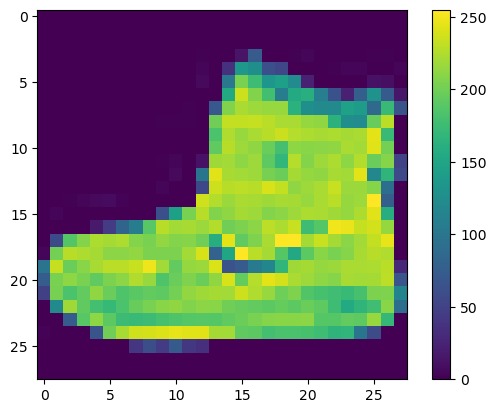

In [6]:
# Section: 预处理数据

# 在训练网络之前，必须对数据进行预处理。
# 如果您检查训练集中的第一个图像，您会看到像素值处于 0 到 255 之间：

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()  # olorbar 即主图旁一个长条状的小图，能够辅助表示主图中 colormap 的颜色组成和颜色与数值的对应关系
plt.grid(False)  # plt.grid() # 显示网格线 1=True=默认显示；0=False=不显示
plt.show()

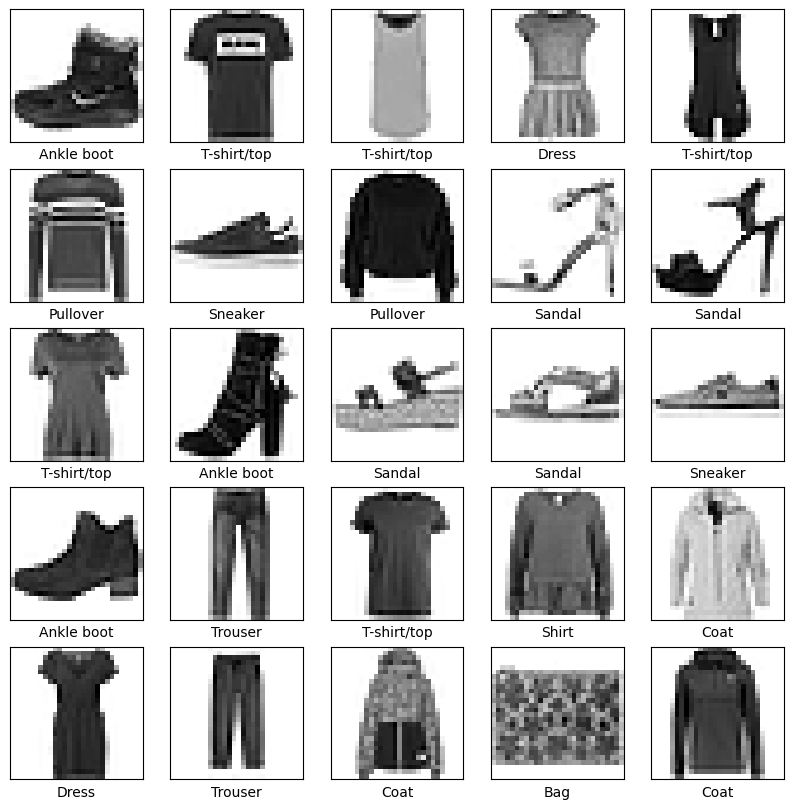

In [7]:
# 将这些值缩小至 0 到 1 之间，然后将其馈送到神经网络模型。
# 为此，请将这些值除以 255。请务必以相同的方式对训练集和测试集进行预处理：

train_images = train_images / 255.0
test_images = test_images / 255.0

# 为了验证数据的格式是否正确，
# 以及您是否已准备好构建和训练网络，让我们显示训练集中的前 25 个图像，并在每个图像下方显示类名称
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)  # plt.subplot()函数用于直接指定划分方式和位置进行绘图。,5行5列当前位置为i+1
    plt.xticks([])  # 获取或设置当前x轴刻度位置和标签。若不传递任何参数，则返回当前刻度值  若传入空列表，即不显示x轴
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)  # cmap 参数是用于绘制图像的颜色映射。 binary 颜色映射，这将导致图像被渲染成黑白两色
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
# SECTION: 构建模型
'''
构建模型需要先配置模型的层，然后在编译模型

# SECTION: 

神经网络的基本组成部分是层，层会从向其馈送的数据中提取表示形式，

大多数深度学习都包括将简单的层链接在一起，大多数层（如tf.keras.layers。Dense）都具有在学习期间才会学习的参数

该网络的第一层 tf.keras.layers.Flatten 将图像格式从二维数组（28 x 28 像素）转换成一维数组（28 x 28 = 784 像素）。
将该层视为图像中未堆叠的像素行并将其排列起来。该层没有要学习的参数，它只会重新格式化数据。

展平像素后，网络会包括两个 tf.keras.layers.Dense 层的序列。它们是密集连接或全连接神经层。
第一个 Dense 层有 128 个节点（或神经元）。第二个（也是最后一个）层会返回一个长度为 10 的 logits 数组。
每个节点都包含一个得分，用来表示当前图像属于 10 个类中的哪一类。
'''
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # 将图像格式从二维数组（28 x 28 像素）转换成一维数组（28 x 28 = 784 像素）
    tf.keras.layers.Dense(128, activation='relu'),  # activation=None, 激活函数，不指定则没有
    tf.keras.layers.Dense(10)  # 正整数，输出空间的维数
])

In [9]:
# SECTION 编译模型
'''SECTION:编译模型
在准备对模型进行训练之前，还需要再对其进行一些设置，以下内容是在模型的编译步骤中添加：

- 损失函数(loss)：测量模型在训练期间的准确程度，你希望最小化此函数，以便将模型“引导”到正确的方向上

- 优化(optimizer)器：决定模型如何根据其看到的数据和自身的损失函数进行更新

- 指标：用于监控训练和测试步骤，以下示例使用了准确率，即被正确分类的图像的比例


'''

# adam:学习率
# 损失函数经常需要使用softmax函数来将输出转化为概率分布的形式，
# 在这里from_logits代表是否将输出转为概率分布的形式，
# 为False时表示转换为概率分布，为True时表示不转换，直接输出
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# SECTION: 训练模型

'''
训练神经网络模型需要执行以下步骤：

- 将训练数据馈送给模型，训练数据位于train_images和train_labels数组中

- 模型学习将图像和标签关联起来

- 要求模型对测试集进行预测

- 验证预测是否与test_labels数组中的标签想匹配

在模型训练期间，会显示损失函数和准确率指标，此模型在训练数据上的准确率达到了0.91（或91%）左右
'''

# 向模型馈送数据
# 要开始训练，请调用model.fit方法，这样命名是因为该方法会将模型与训练数据进行：拟合

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5007 - accuracy: 0.8239
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3755 - accuracy: 0.8631
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3339 - accuracy: 0.8783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3130 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2940 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2778 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2663 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2550 - accuracy: 0.9054
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2459 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

In [10]:
# SECTION：评估准确率
'''

model.fit 和model.evaluate 中的 verbose的用法相同
verbose：日志显示
verbose = 0 为不在标准输出流输出日志信息
verbose = 1 为输出进度条记录(默认)
verbose = 2 没有进度条，只是输出一行记录
'''
# 接下来，比较模型在测试数据集上的表现

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3411 - accuracy: 0.8805 - 520ms/epoch - 2ms/step

Test accuracy: 0.8805000185966492


In [11]:
# SECTION:进行预测

'''
模型经过训练后，您可以使用它对一些图像进行预测，附加softmax层
将模型的线性输出logits转换成更容易理解的概率

softmax层只是对神经网络的输出结果进行了一次换算，将输出结果用概率的形式表现出来。

'''

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

# 模型预测了测试集中每个图像的标签。我们来看看第一个预测结果：
print(predictions[0])

# 预测结果是一个包含10个数字的数组，他们代表模型对10种不同服装中每种服装的置信度，，可以查看哪个标签的置信度最大
print("第一个图像预测的类型：", np.argmax(predictions[0]))
print("第一个图像对应的标签：", test_labels[0])

313/313 [==============================] - 0s 942us/step
[2.3320162e-10 2.4379988e-08 2.1689654e-10 2.1575186e-11 7.7993412e-10
 6.5260821e-05 1.2544830e-09 7.5676017e-03 1.5663126e-08 9.9236709e-01]
第一个图像预测的类型： 9
第一个图像对应的标签： 9


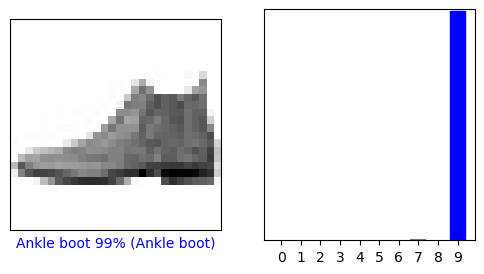

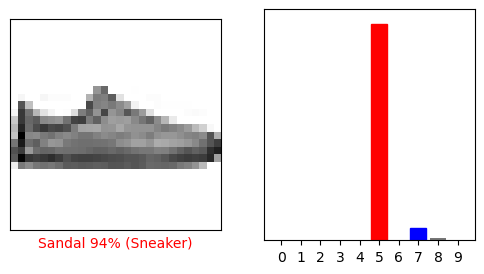

In [12]:
# 绘制图表，看看模型对于全部10个类的预测
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100 * np.max(predictions_array),
                                         class_names[true_label]), color=color)


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


i = 0
plt.figure(figsize=(6, 3))  # figsize:指定figure的宽和高，单位为英寸；
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

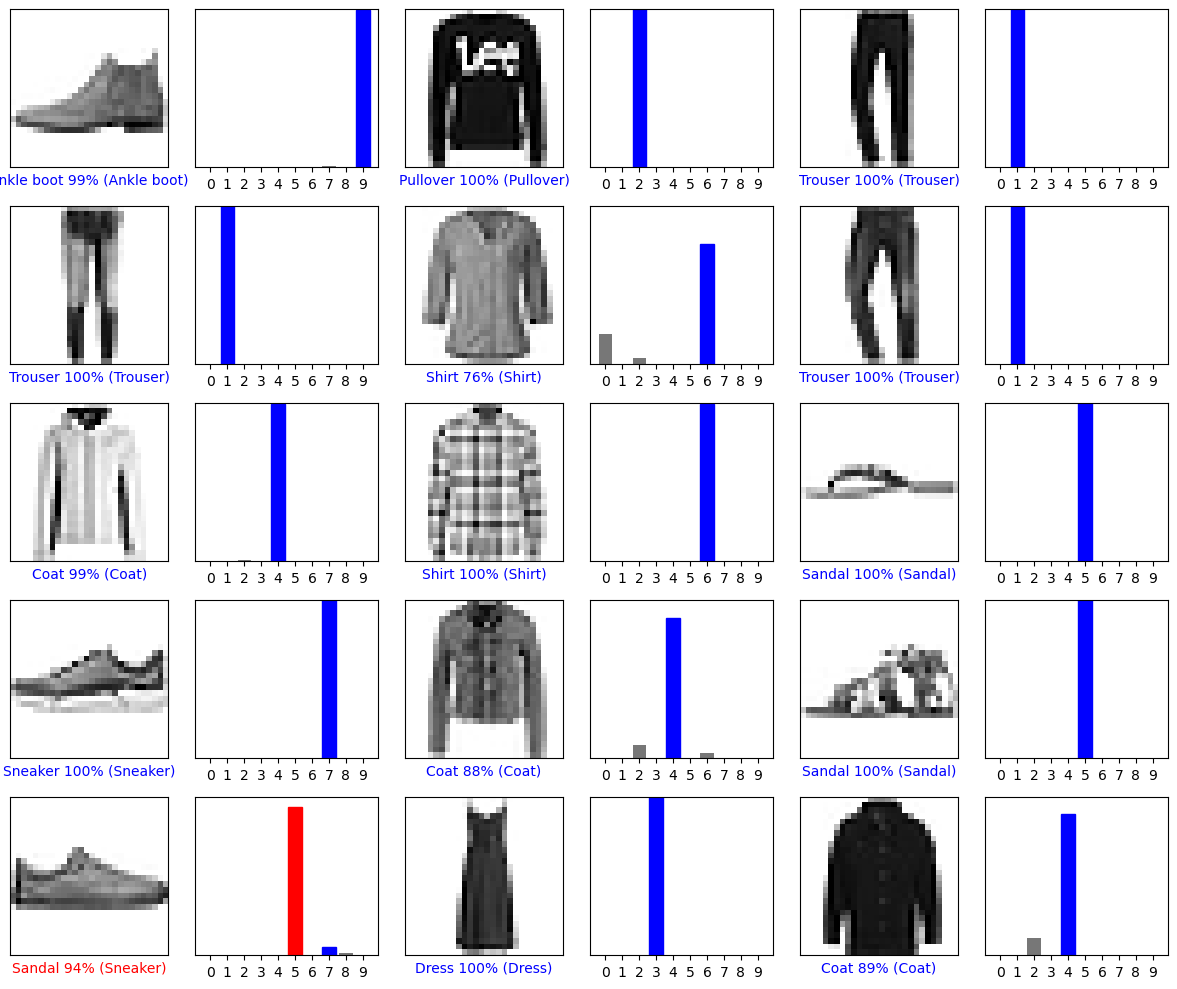

In [13]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

单个图像的shape: (28, 28)
图形维度发生改变： (1, 28, 28)
1/1 [==============================] - 0s 18ms/step
对单个图形进行预测： [[1.2356641e-06 3.7260245e-13 9.9960226e-01 1.8893952e-10 3.5051827e-04
  1.8372075e-11 4.5968653e-05 1.8900345e-16 3.8254559e-11 1.3099563e-11]]
预测图像类别： 2


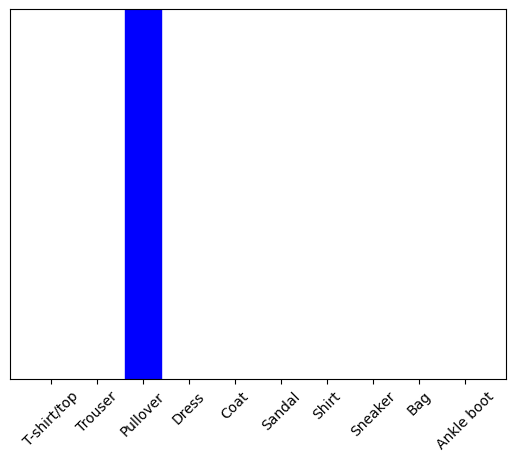

In [14]:
# SECTION:使用训练好的模型对单个图像进行预测
img = test_images[1]
print("单个图像的shape:", img.shape)

# tf.keras 模型经过了优化，可同时对一个批或一组样本进行预测。
# 因此，即便您只使用一个图像，您也需要将其添加到列表中：
img = (np.expand_dims(img, 0))  # 扩展数组的形状。
print("图形维度发生改变：", img.shape)

#  keras.Model.predict会返回一组列表，
#  每个列表对应一批数据中的每个图像。在批次中获取对我们（唯一）图像的预测：
predictions_single = probability_model.predict(img)
print("对单个图形进行预测：", predictions_single)
print("预测图像类别：", np.argmax(predictions_single[0]))

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()